In [1]:
# Test av varians

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Parameter
mu = 200
sig0 = 2

Forkast hvis hat{sigma^2} >= 6.282
alpha (95% CI): 0.046±0.004


Text(0.5, 0, 'sigma^2')

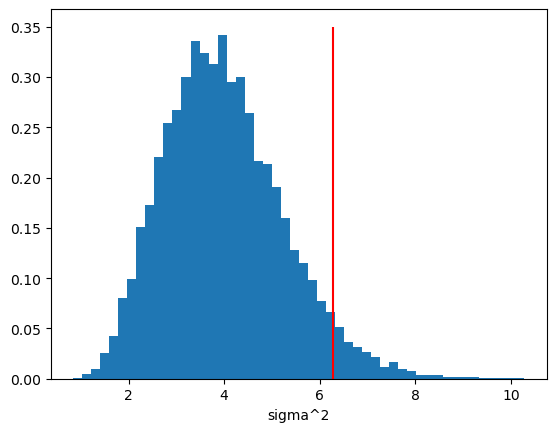

In [3]:
# Beslutningsregel
alpha = 0.05
nObs = 20
sig2Crit = (sig0**2)*stats.chi2.ppf(1-alpha, df = nObs)/nObs
print("Forkast hvis hat{sigma^2} >=", round(sig2Crit, 3))


# Sjekk signifikansnivå
nSamp = 10000
s2Samp = np.zeros(nSamp)
for b in range(nSamp):
    xVal = stats.norm.rvs(loc = mu, scale = sig0, size = nObs)
    xVar = np.mean((xVal-mu)**2)
    s2Samp[b] = xVar
alphaEst = np.mean(s2Samp >= sig2Crit)
print("alpha (95% CI): ", round(alphaEst, 3), "±", round(1.960*np.sqrt(alphaEst*(1-alphaEst)/nSamp),3), sep="")
h = plt.hist(s2Samp, 50, density = True)
h = plt.vlines([sig2Crit], 0, 0.35, 'r')
plt.xlabel("sigma^2")

Text(0.5, 0, 'sigma^2')

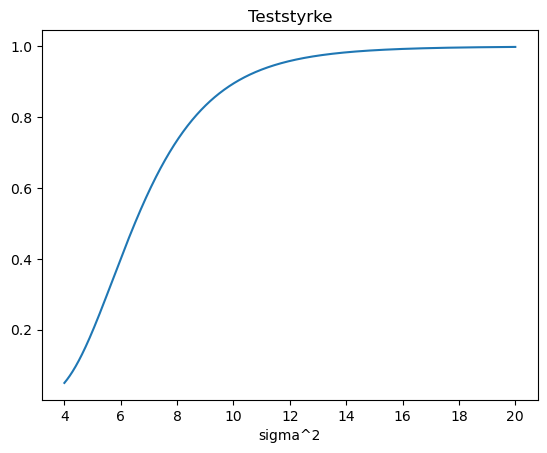

In [4]:
# Plott teststyrke
sig2Grid = np.linspace(4, 20, 1000)
pVals = 1-stats.chi2.cdf(sig2Crit/sig2Grid*nObs, df = nObs)
plt.plot(sig2Grid, pVals)
plt.title("Teststyrke")
plt.xlabel("sigma^2")

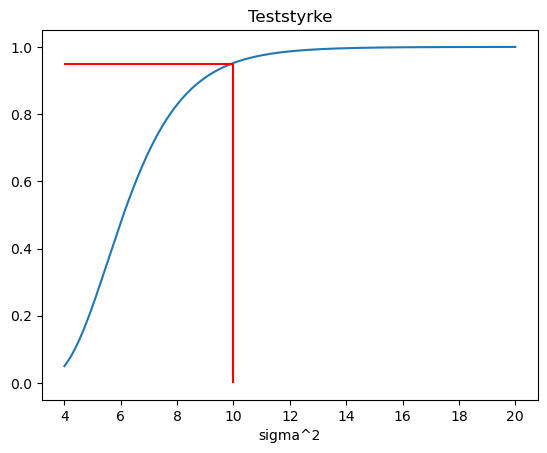

In [5]:
# Sjekk for nObs = 27
nObs = 27
sig2Grid = np.linspace(4, 20, 1000)
sig2Crit = (sig0**2)*stats.chi2.ppf(1-alpha, df = nObs)/nObs
pVals = 1-stats.chi2.cdf(sig2Crit*nObs/sig2Grid, df = nObs)
plt.plot(sig2Grid, pVals)
plt.title("Teststyrke")
plt.xlabel("sigma^2")
plt.vlines(10, 0, 0.95, 'r')
plt.hlines(0.95, 4, 10, 'r')

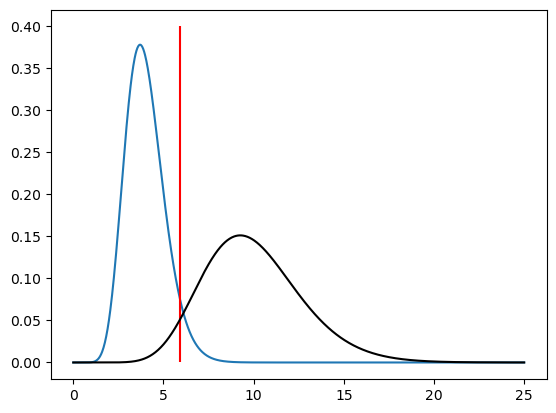

In [13]:
# Illustrasjon av forkastningsregel
alpha = 0.05
nObs = 27
sig2Crit = (sig0**2)*stats.chi2.ppf(1-alpha, df = nObs)/nObs

# Plot fordeling av hat[sig2] under H0
sig2Grid = np.linspace(0, 25, 1000)
fVal0 = stats.chi2.pdf(sig2Grid*nObs/sig0**2, df = nObs)*nObs/sig0**2
plt.plot(sig2Grid, fVal0)
plt.vlines(sig2Crit, 0, 0.4, 'r')

# Plot fordeling under sig2 = 10
sig1 = np.sqrt(10)
fVal1 = stats.chi2.pdf(sig2Grid*nObs/sig1**2, df = nObs)*nObs/sig1**2
plt.plot(sig2Grid, fVal1, 'k')